<a href="https://colab.research.google.com/github/Samuel1820ERA/DatosAgroColombia/blob/main/datos_colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

# ----------------------------------------
# 1. Definir ruta de trabajo
# ----------------------------------------
ruta_carpeta = "/content/drive/MyDrive/COLOMBIA/Datos"
# os.makedirs(ruta_carpeta, exist_ok=True) # Removed as os.makedirs is not supported for Google Drive paths

# ----------------------------------------
# 2. Cargar archivos
# ----------------------------------------
archivo1 = os.path.join(ruta_carpeta, "datos_2006_2018.xlsx")
archivo2 = os.path.join(ruta_carpeta, "datos_2019_2024.xlsx")

df1 = pd.read_excel(archivo1)
df2 = pd.read_excel(archivo2)

# ----------------------------------------
# 3. Normalizar nombres de columnas
# ----------------------------------------
def limpiar_columnas(cols):
    return (
        cols.str.strip()                           # quitar espacios inicio/fin
            .str.lower()                           # todo en minúsculas
            .str.replace(" ", "_", regex=True)     # espacios -> _
            .str.replace(r"[^a-z0-9_]", "", regex=True)  # quitar caracteres raros
    )

df1.columns = limpiar_columnas(df1.columns)
df2.columns = limpiar_columnas(df2.columns)

print("Columnas en df1:", len(df1.columns), list(df1.columns))
print("Columnas en df2:", len(df2.columns), list(df2.columns))

# ----------------------------------------
# 4. Concatenar bases
# ----------------------------------------
df_final = pd.concat([df1, df2], axis=0, join="outer", ignore_index=True)

# ----------------------------------------
# 5. Revisar duplicados de nombres de columnas
# ----------------------------------------
duplicadas = df_final.columns[df_final.columns.duplicated()].tolist()
if duplicadas:
    print(" Columnas duplicadas detectadas:", duplicadas)
    df_final = df_final.loc[:, ~df_final.columns.duplicated()]  # dejar solo una copia
else:
    print(" No hay columnas duplicadas")

# ----------------------------------------
# 6. Guardar resultado
# ----------------------------------------
archivo_salida = os.path.join(ruta_carpeta, "datos_2006_2024.xlsx")
df_final.to_excel(archivo_salida, index=False)

print("\n Archivo guardado en:", archivo_salida)
print("Filas totales:", df_final.shape[0])
print("Columnas totales:", df_final.shape[1])

Columnas en df1: 17 ['cdigo_departamento', 'departamento', 'cdigo_municipio', 'municipio', 'grupo_cultivo', 'subgrupo_de_cultivo', 'cultivo', 'desagregacin_cultivo', 'ao', 'periodo', 'rea_sembradaha', 'rea_cosechadaha', 'produccint', 'rendimientotha', 'estado_fsico_del_cultivo', 'nombre_cientfico_del_cultivo', 'ciclo_del_cultivo']
Columnas en df2: 17 ['cdigo_departamento', 'departamento', 'cdigo_municipio', 'municipio', 'desagregacin_cultivo', 'cultivo', 'ciclo_del_cultivo', 'grupo_cultivo', 'subgrupo_de_cultivo', 'ao', 'periodo', 'rea_sembrada_ha', 'rea_cosechada_ha', 'produccin_t', 'rendimiento_tha', 'nombre_cientfico_del_cultivo', 'estado_fsico_del_cultivo']
 No hay columnas duplicadas

 Archivo guardado en: /content/drive/MyDrive/COLOMBIA/Datos/datos_2006_2024.xlsx
Filas totales: 351920
Columnas totales: 21


Dado que la normalización de nombres de columnas se realizó antes de la concatenación, estas columnas adicionales están vacías (NaN values) y no contienen información relevante, ya que los datos de esas columnas se unieron correctamente bajo los nombres de columnas normalizados. Por lo tanto, la presencia de estas columnas adicionales vacías no afecta la integridad ni la calidad de los datos combinados.


### Análisis Exploratorio de Datos

Primero, mostraremos la cantidad de filas y columnas en el conjunto de datos.

In [ ]:
print("Cantidad de filas:", df_final.shape[0])
print("Cantidad de columnas:", df_final.shape[1])

missing_values = df_final.isnull().sum()
print("\nCantidad de datos faltantes por columna:")
print(missing_values)

unique_crop_groups = df_final['grupo_cultivo'].nunique()
print("\nCantidad de grupos de cultivo únicos:", unique_crop_groups)

Cantidad de filas: 351920
Cantidad de columnas: 21

Cantidad de datos faltantes por columna:
cdigo_departamento                   0
departamento                         0
cdigo_municipio                      0
municipio                            0
grupo_cultivo                        0
subgrupo_de_cultivo                  0
cultivo                              0
desagregacin_cultivo                 0
ao                                   0
periodo                              0
rea_sembradaha                  141073
rea_cosechadaha                 141073
produccint                      141073
rendimientotha                  144631
estado_fsico_del_cultivo             0
nombre_cientfico_del_cultivo      2983
ciclo_del_cultivo                    0
rea_sembrada_ha                 210847
rea_cosechada_ha                210847
produccin_t                     210847
rendimiento_tha                 210847
dtype: int64

Cantidad de grupos de cultivo únicos: 21


Luego, identificaremos la cantidad de datos faltantes por columna.

In [ ]:
missing_values = df_final.isnull().sum()
print("Cantidad de datos faltantes por columna:")
print(missing_values)

Cantidad de datos faltantes por columna:
cdigo_departamento                   0
departamento                         0
cdigo_municipio                      0
municipio                            0
grupo_cultivo                        0
subgrupo_de_cultivo                  0
cultivo                              0
desagregacin_cultivo                 0
ao                                   0
periodo                              0
rea_sembradaha                  141073
rea_cosechadaha                 141073
produccint                      141073
rendimientotha                  144631
estado_fsico_del_cultivo             0
nombre_cientfico_del_cultivo      2983
ciclo_del_cultivo                    0
rea_sembrada_ha                 210847
rea_cosechada_ha                210847
produccin_t                     210847
rendimiento_tha                 210847
dtype: int64


A continuación, contaremos la cantidad de grupos de cultivo únicos.

In [ ]:
unique_crop_groups = df_final['grupo_cultivo'].nunique()
print("\nCantidad de grupos de cultivo únicos:", unique_crop_groups)


Cantidad de grupos de cultivo únicos: 21


Ahora, encontraremos los 10 principales grupos de cultivo por área sembrada.


Los 10 grupos de cultivo con mayor área sembrada:


,rea_sembradaha
grupo_cultivo,
OTROS PERMANENTES,1.893753e+07
CEREALES,1.475517e+07
TUBERCULOS Y PLATANOS,1.061708e+07
OLEAGINOSAS,6.112380e+06
FRUTALES,4.874503e+06
LEGUMINOSAS,2.635698e+06
HORTALIZAS,1.047659e+06
FIBRAS,6.422523e+05
FORESTALES,5.593788e+05


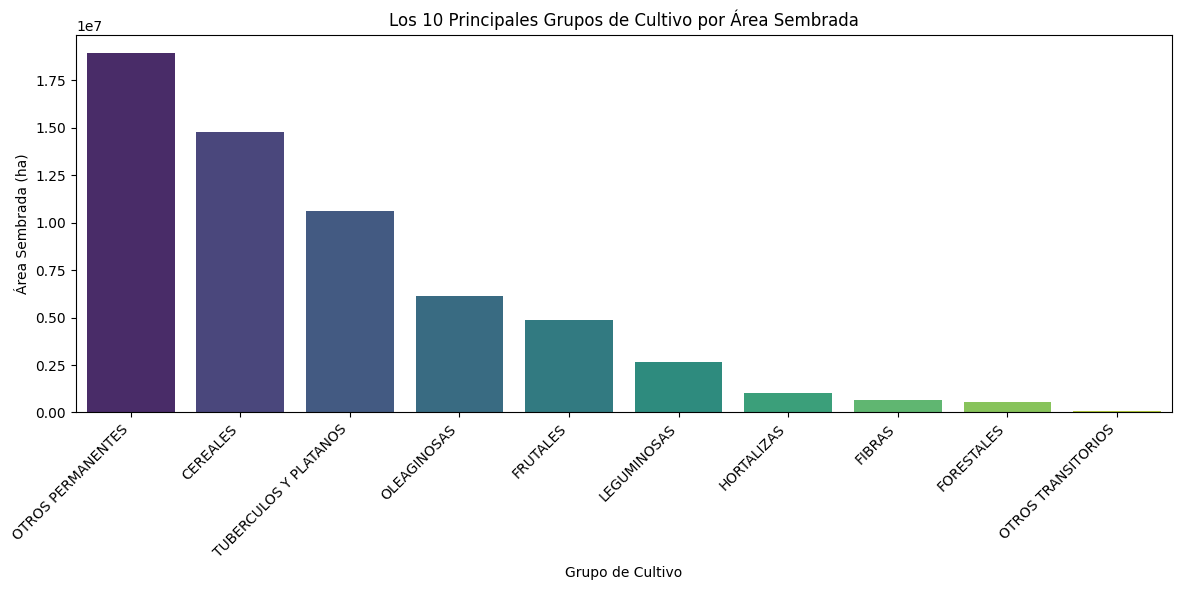

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_crops = df_final.groupby('grupo_cultivo')['rea_sembradaha'].sum().nlargest(10)
print("\nLos 10 grupos de cultivo con mayor área sembrada:")
display(top_10_crops)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_crops.index, y=top_10_crops.values, hue=top_10_crops.index, palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Grupo de Cultivo')
plt.ylabel('Área Sembrada (ha)')
plt.title('Los 10 Principales Grupos de Cultivo por Área Sembrada')
plt.tight_layout()
plt.show()

# Los principales cultivos en "Otros permanentes" por Area sembrada.

In [ ]:
df_otros_permanentes = df_final[df_final['grupo_cultivo'] == 'OTROS PERMANENTES']
display(df_otros_permanentes.head())

,cdigo_departamento,departamento,cdigo_municipio,municipio,grupo_cultivo,subgrupo_de_cultivo,cultivo,desagregacin_cultivo,ao,periodo,...,rea_cosechadaha,produccint,rendimientotha,estado_fsico_del_cultivo,nombre_cientfico_del_cultivo,ciclo_del_cultivo,rea_sembrada_ha,rea_cosechada_ha,produccin_t,rendimiento_tha
32832,5,ANTIOQUIA,5045,APARTADO,OTROS PERMANENTES,CACAO,CACAO,CACAO,2007,2007,...,1640.0,656.0,0.40,GRANO SECO,THEOBROMA CACAO,PERMANENTE,NaN,NaN,NaN,NaN
32833,5,ANTIOQUIA,5837,TURBO,OTROS PERMANENTES,CACAO,CACAO,CACAO,2007,2007,...,760.0,304.0,0.40,GRANO SECO,THEOBROMA CACAO,PERMANENTE,NaN,NaN,NaN,NaN
32834,5,ANTIOQUIA,5425,MACEO,OTROS PERMANENTES,CACAO,CACAO,CACAO,2007,2007,...,798.0,279.3,0.35,GRANO SECO,THEOBROMA CACAO,PERMANENTE,NaN,NaN,NaN,NaN
32835,5,ANTIOQUIA,5885,YALI,OTROS PERMANENTES,CACAO,CACAO,CACAO,2007,2007,...,269.0,188.3,0.70,GRANO SECO,THEOBROMA CACAO,PERMANENTE,NaN,NaN,NaN,NaN
32836,5,ANTIOQUIA,5490,NECOCLI,OTROS PERMANENTES,CACAO,CACAO,CACAO,2007,2007,...,151.0,60.4,0.40,GRANO SECO,THEOBROMA CACAO,PERMANENTE,NaN,NaN,NaN,NaN


In [ ]:
cultivos_otros_permanentes = df_otros_permanentes.groupby('cultivo')['rea_sembradaha'].sum()

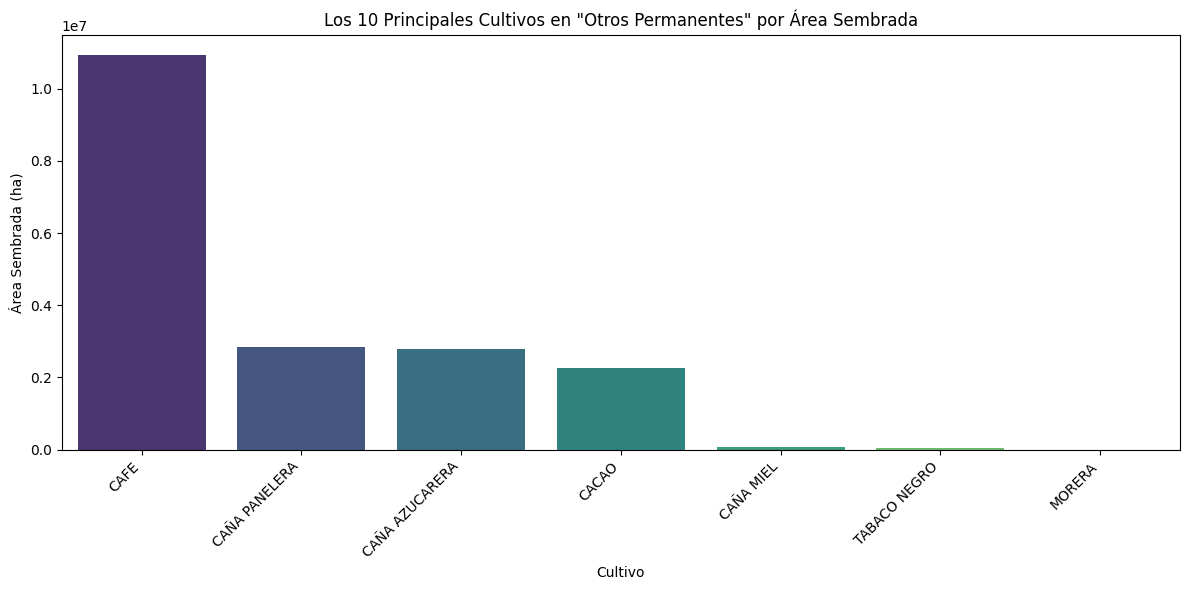

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_otros_permanentes.index, y=top_10_otros_permanentes.values, hue=top_10_otros_permanentes.index, palette='viridis', legend=False)
plt.title('Los 10 Principales Cultivos en "Otros Permanentes" por Área Sembrada')
plt.xlabel('Cultivo')
plt.ylabel('Área Sembrada (ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()